# Handling Duplicate Data

In [1]:
import pandas as pd

In [2]:
data = {"name" : ["a","b","c","d","a","c"], "English" : [8,7,6,9,8,6], "Hindi" : [5,8,9,7,5,3]}

In [3]:
df = pd.DataFrame(data)
df

,name,English,Hindi
0,a,8,5
1,b,7,8
2,c,6,9
3,d,9,7
4,a,8,5
5,c,6,3


In [4]:
df.duplicated()

0    False
1    False
2    False
3    False
4     True
5    False
dtype: bool

In [7]:
df["duplicated"]=df.duplicated()
df

,name,English,Hindi,duplicated
0,a,8,5,False
1,b,7,8,False
2,c,6,9,False
3,d,9,7,False
4,a,8,5,True
5,c,6,3,False


In [8]:
# That means above data contains duplicates
# Now we remove the duplicate data
data = {"name" : ["a","b","c","d","a","c"], "English" : [8,7,6,9,8,6], "Hindi" : [5,8,9,7,5,3]}

In [9]:
df1 = pd.DataFrame(data)
df1

,name,English,Hindi
0,a,8,5
1,b,7,8
2,c,6,9
3,d,9,7
4,a,8,5
5,c,6,3


In [11]:
df1.drop_duplicates(inplace=True)
df1

,name,English,Hindi
0,a,8,5
1,b,7,8
2,c,6,9
3,d,9,7
5,c,6,3


In [12]:
# In above data 4th number row is removed

In [13]:
dataset = pd.read_csv(r"C:\Users\Vaishnav\Downloads\loan_data_set.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
dataset.shape

(614, 13)

In [15]:
dataset.drop_duplicates(inplace=True)

In [16]:
dataset.shape

(614, 13)

In [17]:
# Here after appling drop_duplicated() method shape remain same means this data contains no duplicates

# Replace and data type change

In [18]:
import pandas as pd

In [55]:
dataset = pd.read_csv(r"C:\Users\Vaishnav\Downloads\loan_data_set.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [57]:
# We perform this operation on "Dependents" column
# In "Dependents" column contains numeric values but it's data type is object type so we convert this object type to int64 type
# First we check there is any null value present in this column or not, If there is any null value present then we fill that null value

dataset.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [58]:
# In "Dependents" column contains total 15 null values

dataset["Dependents"]=dataset["Dependents"].fillna(dataset["Dependents"].mode()[0])

In [59]:
dataset.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
# Now there is no null value present in "Dependents" column
# Now we check which type of values "Dependents" column have
dataset["Dependents"].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [61]:
# Now we replace 3+ to 3
# Here we give data in "string" format not "int" format because our datatype for "Dependents" still object type

dataset["Dependents"] = dataset["Dependents"].replace("3+","3")

In [62]:
# Now we check 3+ replace with 3 or not
dataset["Dependents"].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [64]:
# In dataset total 614 rows present. Here in "Dependents" column total 614 rows are non null, means all rows fiils with some data. 
# here still datatype of "Dependents" is object. we convert it into int type
dataset["Dependents"] = dataset["Dependents"].astype("int64")

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [66]:
# So we convert data type of "Dependents" column to "int64"

# Function Transformer

In [67]:
# When you used function Transformer: If we want to convert non-normal distribution data to normal distribution data, at that time we use Function Transformer.
# Also when we want to change our data patern at that time we also use Function Transformer

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [68]:
dataset = pd.read_csv(r"C:\Users\Vaishnav\Downloads\loan_data_set.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [70]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [74]:
# here we perform Function transformer for "CoapplicantIncome" column because it don't have null value present. we also perform this same thing for "ApplicantIncome" column also
# We also perform function transformer for those data who contains outliers or without outlier it gives same result
# first we perform function transformation for data who do not contains outliers
# for that we use IQR method to remove outliers


C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_21320\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


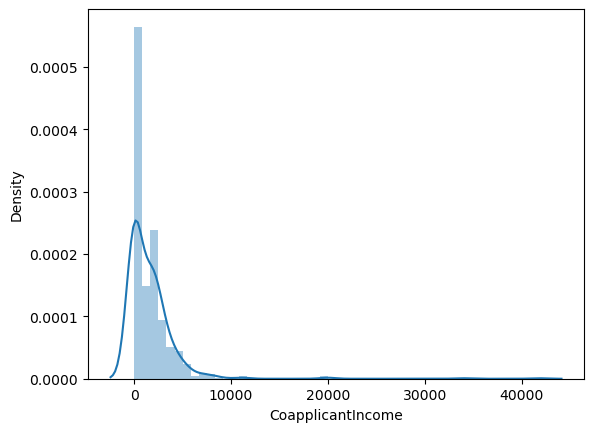

In [73]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [75]:
# Above grapg shows that data contains outliers
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)
q1, q3

(0.0, 2297.25)

In [76]:
IQR = q3 - q1
IQR

2297.25

In [77]:
min_r = q1 - (1.5 * IQR)
max_r = q3 + (1.5 * IQR)
min_r, max_r

(-3445.875, 5743.125)

In [78]:
# It means all the value outside of "max_r" are outliers
dataset = dataset[dataset["CoapplicantIncome"]<=max_r] 

C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_21320\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


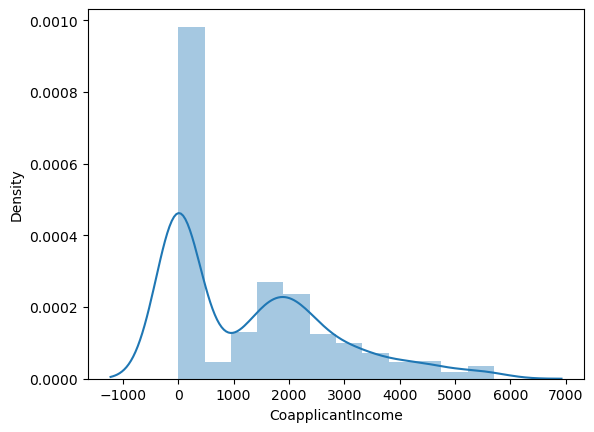

In [79]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [80]:
# Now above graph doesn't contains outliers.And it's look like a non normal distribution curve.
# Now we convert above graph to normal distribution curve.
from sklearn.preprocessing import FunctionTransformer


In [81]:
# Here we also use x^2 func also. means "ft = FunctionTransformer(func= lambda x : x**2)"
ft = FunctionTransformer(func= np.log1p )
ft.fit(dataset[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [83]:
dataset["CoapplicantIncome_ft"] = ft.transform(dataset[["CoapplicantIncome"]])

C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_21320\2128625271.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_21320\2128625271.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_ft"])


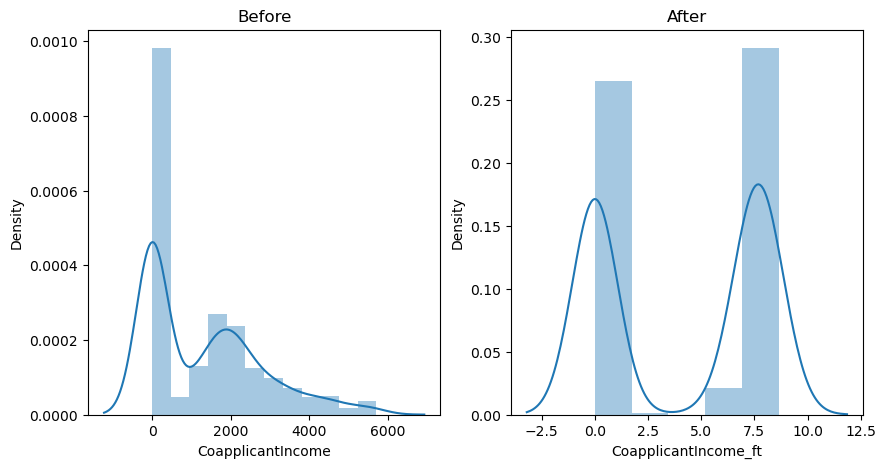

In [85]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["CoapplicantIncome"])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["CoapplicantIncome_ft"])

plt.show()

In [86]:
# It means we convert our data from non normal distribution to normal distribution data.


In [87]:
# Now we perform same thing without removing outliers and check that data form normal distribution curve.
dataset = pd.read_csv(r"C:\Users\Vaishnav\Downloads\loan_data_set.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_21320\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


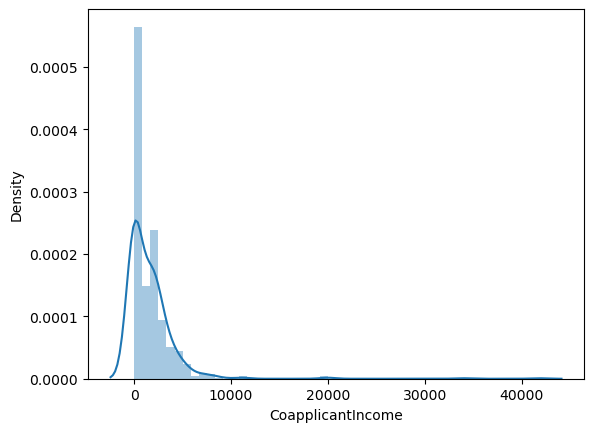

In [88]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [89]:
from sklearn.preprocessing import FunctionTransformer

In [90]:
ft1 = FunctionTransformer(func= np.log1p )
ft1.fit(dataset[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [91]:
dataset["CoapplicantIncome_ft1"] = ft1.transform(dataset[["CoapplicantIncome"]])

C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_21320\430410832.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_21320\430410832.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_ft1"])


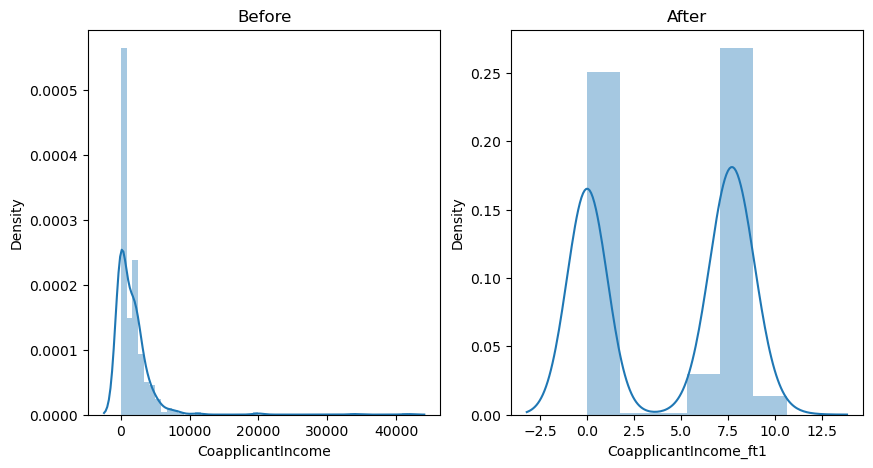

In [92]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["CoapplicantIncome"])


plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["CoapplicantIncome_ft1"])

plt.show()

In [93]:
# That means if you not remove outliers from your data, after appling function transformer technique your data convert to normal distribution.
# When your data have some important information and you don't won't to loos your data (by remove outliers), so using this technique you can perform those things. 